## 1. Import bibliotek i wczytanie danych

In [337]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns

In [338]:
df = pd.read_csv("../../DatCar_swd/Data/cars.csv")
df.head()

,ID,Marka,Model,Skrzynia biegów,Kolor,Nadwozie,Przebieg,Rok produkcji,Pojemność,Rodzaj paliwa,Cena,Gwarancja
0,1,Subaru,Outback,automatic,silver,universal,190000,2010,2.5,gasoline,10900.00,False
1,2,Subaru,Outback,automatic,blue,universal,290000,2002,3.0,gasoline,5000.00,False
2,3,Subaru,Forester,automatic,red,suv,402000,2001,2.5,gasoline,2800.00,False
3,4,Subaru,Impreza,mechanical,blue,sedan,10000,1999,3.0,gasoline,9999.00,False
4,5,Subaru,Legacy,automatic,black,universal,280000,2001,2.5,gasoline,2134.11,False


## 2. Zbiór danych, brakujące wartości

In [339]:
df.shape

(38531, 12)

In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               38531 non-null  int64  
 1   Marka            38531 non-null  object 
 2   Model            38531 non-null  object 
 3   Skrzynia biegów  38531 non-null  object 
 4   Kolor            38531 non-null  object 
 5   Nadwozie         38531 non-null  object 
 6   Przebieg         38531 non-null  int64  
 7   Rok produkcji    38531 non-null  int64  
 8   Pojemność        38521 non-null  float64
 9   Rodzaj paliwa    38531 non-null  object 
 10  Cena             38531 non-null  float64
 11  Gwarancja        38531 non-null  bool   
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 3.3+ MB


In [341]:
df.isna().sum()

ID                  0
Marka               0
Model               0
Skrzynia biegów     0
Kolor               0
Nadwozie            0
Przebieg            0
Rok produkcji       0
Pojemność          10
Rodzaj paliwa       0
Cena                0
Gwarancja           0
dtype: int64

In [342]:
df.dropna(inplace=True) #wywalam bo to tylko 10 modeli
df.shape

(38521, 12)

## 3. Analiza- dane numeryczne i kategoryczne

In [343]:
df['Rok produkcji'].describe()

count    38521.000000
mean      2002.940863
std          8.064761
min       1942.000000
25%       1998.000000
50%       2003.000000
75%       2009.000000
max       2019.000000
Name: Rok produkcji, dtype: float64

In [344]:
df["Age"] = 2022 - df['Rok produkcji'] #dodaję kolumnę Age
df.head()

,ID,Marka,Model,Skrzynia biegów,Kolor,Nadwozie,Przebieg,Rok produkcji,Pojemność,Rodzaj paliwa,Cena,Gwarancja,Age
0,1,Subaru,Outback,automatic,silver,universal,190000,2010,2.5,gasoline,10900.00,False,12
1,2,Subaru,Outback,automatic,blue,universal,290000,2002,3.0,gasoline,5000.00,False,20
2,3,Subaru,Forester,automatic,red,suv,402000,2001,2.5,gasoline,2800.00,False,21
3,4,Subaru,Impreza,mechanical,blue,sedan,10000,1999,3.0,gasoline,9999.00,False,23
4,5,Subaru,Legacy,automatic,black,universal,280000,2001,2.5,gasoline,2134.11,False,21


#### a) Numeric data

In [345]:
df_numeric = df.select_dtypes(include=['int64','float64'])
df_numeric.head()

,ID,Przebieg,Rok produkcji,Pojemność,Cena,Age
0,1,190000,2010,2.5,10900.00,12
1,2,290000,2002,3.0,5000.00,20
2,3,402000,2001,2.5,2800.00,21
3,4,10000,1999,3.0,9999.00,23
4,5,280000,2001,2.5,2134.11,21


In [346]:
df_numeric.describe()

,ID,Przebieg,Rok produkcji,Pojemność,Cena,Age
count,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000,38521.000000
mean,19265.002778,248910.074427,2002.940863,2.055161,6637.160884,19.059137
std,11123.750877,136059.499858,8.064761,0.671178,6425.198996,8.064761
min,1.000000,0.000000,1942.000000,0.200000,1.000000,3.000000
25%,9633.000000,158000.000000,1998.000000,1.600000,2100.000000,13.000000
50%,19263.000000,250000.000000,2003.000000,2.000000,4800.000000,19.000000
75%,28900.000000,325000.000000,2009.000000,2.300000,8950.000000,24.000000
max,38531.000000,1000000.000000,2019.000000,8.000000,50000.000000,80.000000


Najprawdopodobniej nie ma tu "ukrytych" pod innym aliasem NaN-ów.

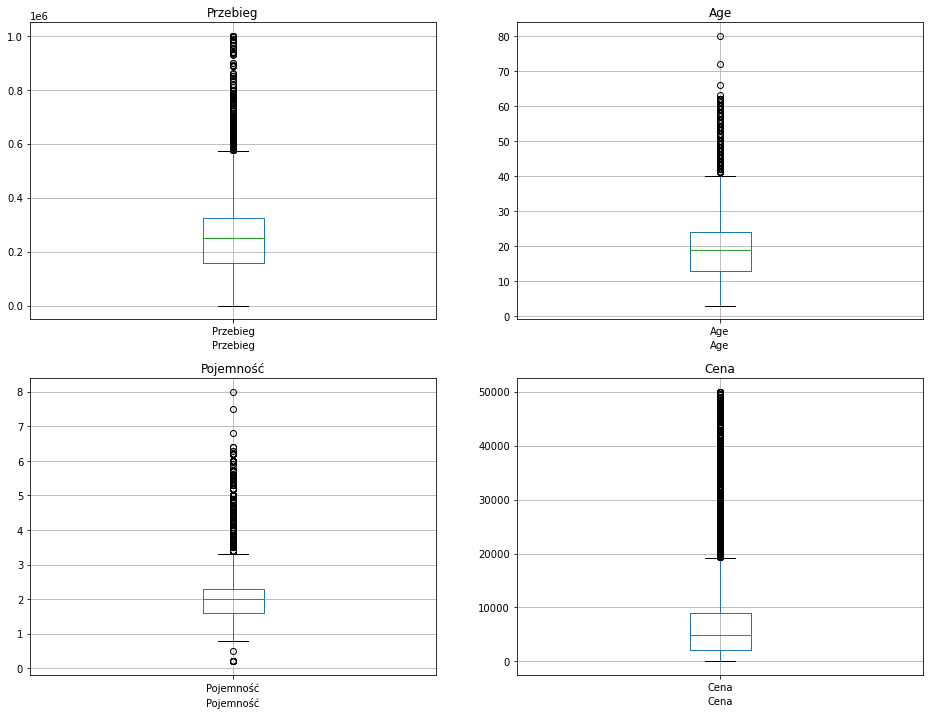

In [347]:
plt.figure(figsize=(16,12))

plt.subplot(221)
plt1 = df["Przebieg"].plot(kind='box')
plt.title('Przebieg')
plt1.set(xlabel = 'Przebieg')
plt.grid()

plt.subplot(222)
plt2 = df['Age'].plot(kind='box')
plt.title('Age')
plt2.set(xlabel = 'Age')
plt.grid()

plt.subplot(223)
plt3 = df["Pojemność"].plot(kind='box')
plt.title('Pojemność')
plt3.set(xlabel = 'Pojemność')
plt.grid()

plt.subplot(224)
plt4 = df["Cena"].plot(kind='box')
plt.title('Cena')
plt4.set(xlabel = 'Cena')
plt.grid()

plt.show()

Najprawdopodobniej nie ma tu "ukrytych" pod innym aliasem NaN-ów.

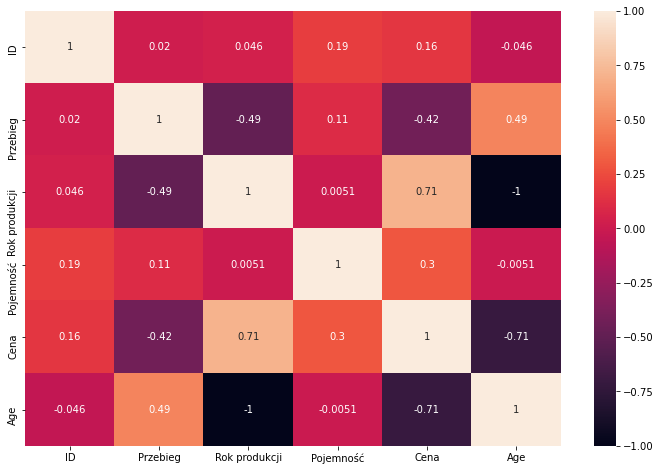

In [348]:
plt.figure(figsize=(12,8))
sns.heatmap(df_numeric.corr(),annot=True)
plt.show()

**Każda z cech numerycznych ma istotny wpływ na cenę, największą rolę odgrywa cecha "Rok produkcji"/"Age"- korelacja aż 71%.**

#### b) Categorical data

In [349]:
df_categorical = df.select_dtypes(include=['object','bool'])
df_categorical.head()

,Marka,Model,Skrzynia biegów,Kolor,Nadwozie,Rodzaj paliwa,Gwarancja
0,Subaru,Outback,automatic,silver,universal,gasoline,False
1,Subaru,Outback,automatic,blue,universal,gasoline,False
2,Subaru,Forester,automatic,red,suv,gasoline,False
3,Subaru,Impreza,mechanical,blue,sedan,gasoline,False
4,Subaru,Legacy,automatic,black,universal,gasoline,False


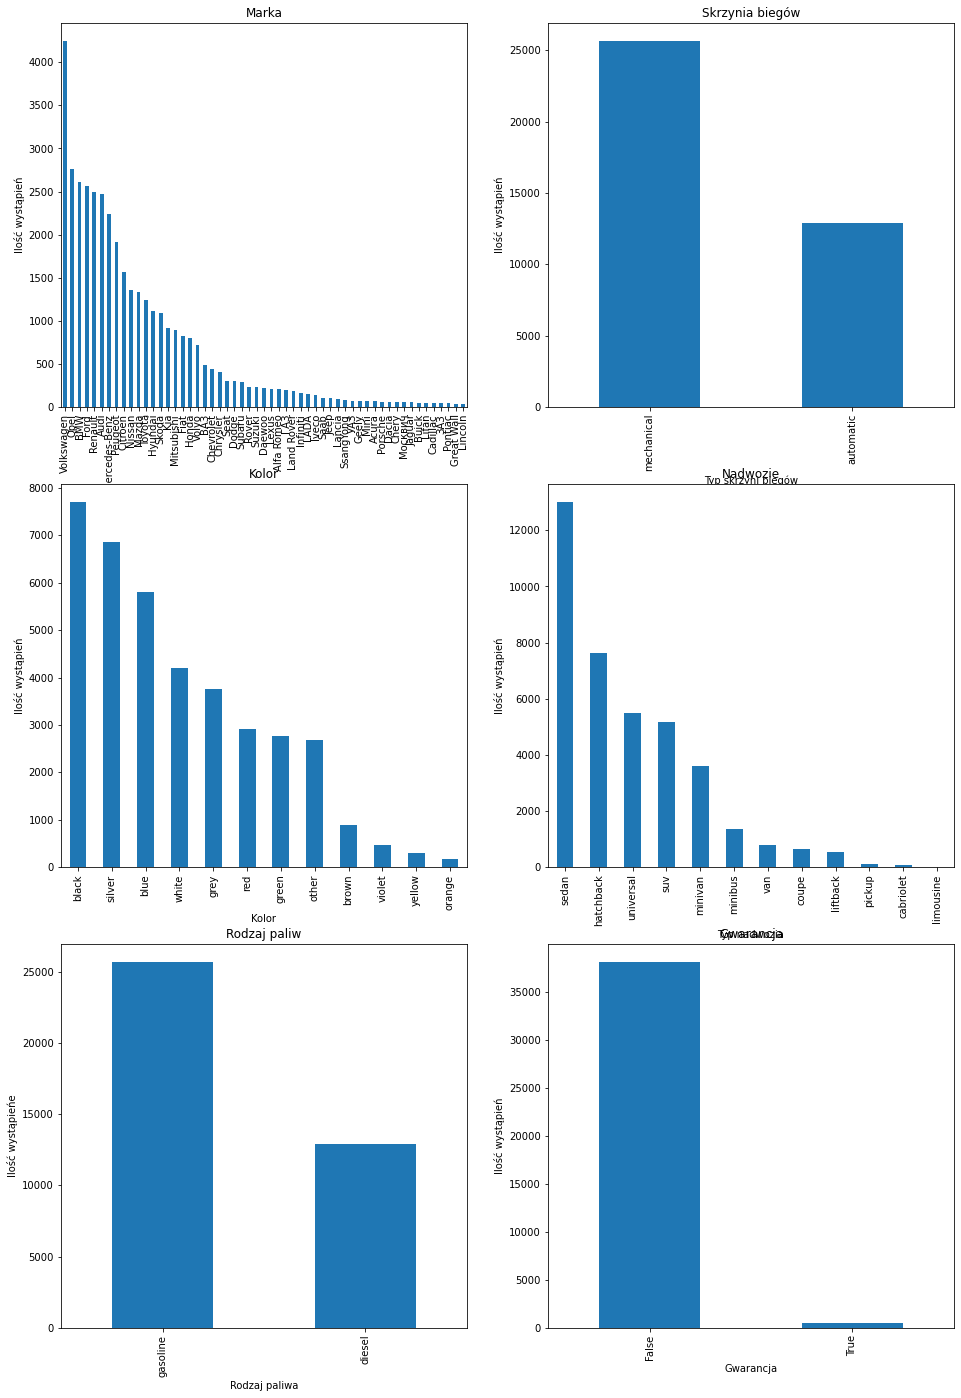

In [350]:
plt.figure(figsize=(16,24))

plt.subplot(321)
plt1 = df["Marka"].value_counts().plot(kind='bar')
plt.title('Marka')
plt1.set(xlabel = 'Car company', ylabel='Ilość wystąpień')

plt.subplot(322)
plt2 = df['Skrzynia biegów'].value_counts().plot(kind='bar')
plt.title('Skrzynia biegów')
plt2.set(xlabel = 'Typ skrzyni biegów', ylabel='Ilość wystąpień')

plt.subplot(323)
plt3 = df["Kolor"].value_counts().plot(kind='bar')
plt.title('Kolor')
plt3.set(xlabel = 'Kolor', ylabel='Ilość wystąpień')

plt.subplot(324)
plt4 = df["Nadwozie"].value_counts().plot(kind='bar')
plt.title('Nadwozie')
plt4.set(xlabel = 'Typ nadwozia', ylabel='Ilość wystąpień')

plt.subplot(325)
plt5 = df["Rodzaj paliwa"].value_counts().plot(kind='bar')
plt.title('Rodzaj paliw')
plt5.set(xlabel = 'Rodzaj paliwa', ylabel='Ilość wystąpieńe')

plt.subplot(326)
plt6 = df["Gwarancja"].value_counts().plot(kind='bar')
plt.title('Gwarancja')
plt6.set(xlabel = 'Gwarancja', ylabel='Ilość wystąpień')

plt.show()

In [351]:
df_categorical.columns

Index(['Marka', 'Model', 'Skrzynia biegów', 'Kolor', 'Nadwozie',
       'Rodzaj paliwa', 'Gwarancja'],
      dtype='object')

In [352]:
for col in df_categorical.columns:
    print(df[col].unique(),"\n")

['Subaru' 'LADA' 'Dodge' 'УАЗ' 'Kia' 'Opel' 'Москвич' 'Alfa Romeo' 'Acura'
 'Dacia' 'Lexus' 'Mitsubishi' 'Lancia' 'Citroen' 'Mini' 'Jaguar' 'Porsche'
 'SsangYong' 'Daewoo' 'Geely' 'ВАЗ' 'Fiat' 'Ford' 'Renault' 'Seat' 'Rover'
 'Volkswagen' 'Lifan' 'Jeep' 'Cadillac' 'Audi' 'ЗАЗ' 'Toyota' 'ГАЗ'
 'Volvo' 'Chevrolet' 'Great Wall' 'Buick' 'Pontiac' 'Lincoln' 'Hyundai'
 'Nissan' 'Suzuki' 'BMW' 'Mazda' 'Land Rover' 'Iveco' 'Skoda' 'Saab'
 'Infiniti' 'Chery' 'Honda' 'Mercedes-Benz' 'Peugeot' 'Chrysler'] 

['Outback' 'Forester' 'Impreza' ... '180' 'Vision' 'Aspen'] 

['automatic' 'mechanical'] 

['silver' 'blue' 'red' 'black' 'grey' 'other' 'brown' 'white' 'green'
 'violet' 'orange' 'yellow'] 

['universal' 'suv' 'sedan' 'hatchback' 'liftback' 'minivan' 'minibus'
 'van' 'pickup' 'coupe' 'cabriolet' 'limousine'] 

['gasoline' 'diesel'] 

[False  True] 



Najprawdopodobniej nie ma tu "ukrytych" pod innym aliasem NaN-ów.

## 4. Dummy variables

"We have around 45 different Car Manufacturing Companies with Different Model Names. If we create dummy variables for all these names, it will result in large number of coulmns which is not feasible for model building. Hence, we will try and create different groups based on Average Price of the cars."

In [353]:
temp = df.copy()

table = temp.groupby(['Marka'])['Cena'].mean()
temp = temp.merge(table.reset_index(), how='left', on='Marka')
print(table)

Marka
Acura            12772.885909
Alfa Romeo        2688.550097
Audi              7154.944923
BMW               9532.098405
Buick            12876.319149
Cadillac         11093.124651
Chery             4545.978103
Chevrolet         8863.759885
Chrysler          4995.491780
Citroen           4433.126204
Dacia             5342.751525
Daewoo            1576.608733
Dodge             5608.011953
Fiat              2979.752689
Ford              4993.888044
Geely             7769.232535
Great Wall        6423.760278
Honda             6515.096474
Hyundai           7926.190394
Infiniti         13794.604938
Iveco            10052.317122
Jaguar           17813.000000
Jeep             10912.489439
Kia               8156.095526
LADA              7598.681370
Lancia            2901.508370
Land Rover       15195.300380
Lexus            17130.560845
Lifan             8280.536170
Lincoln           9737.472222
Mazda             4731.527101
Mercedes-Benz     9389.817072
Mini             13133.700882
Mits

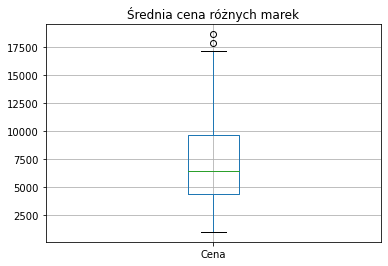

In [354]:
table.plot(kind='box')
plt.grid()
plt.title("Średnia cena różnych marek")
plt.show()

In [355]:
bins = [0,0.2,0.5,0.7,0.9,1]
#bins = [0,5000,8000,11000,15000,100000]
kat_bins = ['Budget','Budget_plus','Medium','Medium_plus','Highend']

In [356]:
temp.head()

,ID,Marka,Model,Skrzynia biegów,Kolor,Nadwozie,Przebieg,Rok produkcji,Pojemność,Rodzaj paliwa,Cena_x,Gwarancja,Age,Cena_y
0,1,Subaru,Outback,automatic,silver,universal,190000,2010,2.5,gasoline,10900.00,False,12,7522.094605
1,2,Subaru,Outback,automatic,blue,universal,290000,2002,3.0,gasoline,5000.00,False,20,7522.094605
2,3,Subaru,Forester,automatic,red,suv,402000,2001,2.5,gasoline,2800.00,False,21,7522.094605
3,4,Subaru,Impreza,mechanical,blue,sedan,10000,1999,3.0,gasoline,9999.00,False,23,7522.094605
4,5,Subaru,Legacy,automatic,black,universal,280000,2001,2.5,gasoline,2134.11,False,21,7522.094605


In [357]:
df['Kategoria'] = pd.qcut(temp['Cena_y'], bins, labels=kat_bins)
#df['Kategoria'] = pd.cut(temp['Cena_y'], bins,  right=False, labels=kat_bins)
df.head()

,ID,Marka,Model,Skrzynia biegów,Kolor,Nadwozie,Przebieg,Rok produkcji,Pojemność,Rodzaj paliwa,Cena,Gwarancja,Age,Kategoria
0,1,Subaru,Outback,automatic,silver,universal,190000,2010,2.5,gasoline,10900.00,False,12,Medium
1,2,Subaru,Outback,automatic,blue,universal,290000,2002,3.0,gasoline,5000.00,False,20,Medium
2,3,Subaru,Forester,automatic,red,suv,402000,2001,2.5,gasoline,2800.00,False,21,Medium
3,4,Subaru,Impreza,mechanical,blue,sedan,10000,1999,3.0,gasoline,9999.00,False,23,Medium
4,5,Subaru,Legacy,automatic,black,universal,280000,2001,2.5,gasoline,2134.11,False,21,Medium


In [358]:
df['Kategoria'].unique()

['Medium', 'Budget_plus', 'Budget', 'Medium_plus', 'Highend', NaN]
Categories (5, object): ['Budget' < 'Budget_plus' < 'Medium' < 'Medium_plus' < 'Highend']

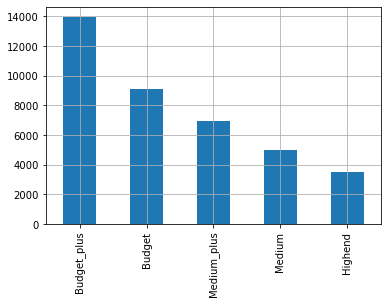

In [359]:
kat_count = df['Kategoria'].value_counts()
kat_count.plot(kind='bar')
plt.grid()
plt.show()

In [360]:
df[df['Kategoria'].isna()]   #WHY, TO NIE MA SENSU

,ID,Marka,Model,Skrzynia biegów,Kolor,Nadwozie,Przebieg,Rok produkcji,Pojemność,Rodzaj paliwa,Cena,Gwarancja,Age,Kategoria
38521,38522,Chrysler,Neon,mechanical,green,sedan,260000,1995,2.0,gasoline,550.00,False,27,NaN
38522,38523,Chrysler,PT Cruiser,automatic,other,hatchback,207605,2004,2.4,gasoline,4000.00,False,18,NaN
38523,38524,Chrysler,Grand Voyager,mechanical,black,minivan,278000,1999,2.5,diesel,4220.81,False,23,NaN
38524,38525,Chrysler,300,automatic,silver,sedan,240000,2001,3.5,gasoline,3000.00,False,21,NaN
38525,38526,Chrysler,Voyager,mechanical,violet,minivan,317000,1999,2.0,gasoline,3300.00,False,23,NaN
38526,38527,Chrysler,300,automatic,silver,sedan,290000,2000,3.5,gasoline,2750.00,False,22,NaN
38527,38528,Chrysler,PT Cruiser,mechanical,blue,hatchback,321000,2004,2.2,diesel,4800.00,False,18,NaN
38528,38529,Chrysler,300,automatic,blue,sedan,777957,2000,3.5,gasoline,4300.00,False,22,NaN
38529,38530,Chrysler,PT Cruiser,mechanical,black,minivan,20000,2001,2.0,gasoline,4000.00,False,21,NaN
38530,38531,Chrysler,Voyager,automatic,silver,minivan,297729,2000,2.4,gasoline,3200.00,False,22,NaN


In [361]:
df.dropna(inplace=True) #wyrzucam bo to tylko 10 rekordów
df.drop(['Marka','Model','Rok produkcji'],axis=1, inplace=True)

In [362]:
def dummies(col_name,df):
    temp = pd.get_dummies(df[[col_name]], drop_first=True)
    df = pd.concat([df,temp], axis=1)
    df.drop([col_name], axis=1, inplace=True)
    return df

#Marka	Model	Skrzynia biegów	Kolor	Nadwozie	Rodzaj paliwa	Gwarancja

# Apply function to the cars_new df

df_dummies = dummies('Skrzynia biegów', df)
df_dummies = dummies('Kolor', df_dummies)
df_dummies = dummies('Nadwozie', df_dummies)
df_dummies = dummies('Rodzaj paliwa', df_dummies)
df_dummies = dummies('Gwarancja', df_dummies)
df_dummies = dummies('Kategoria', df_dummies)
df_dummies.head()

,ID,Przebieg,Pojemność,Cena,Age,Skrzynia biegów_mechanical,Kolor_blue,Kolor_brown,Kolor_green,Kolor_grey,...,Nadwozie_pickup,Nadwozie_sedan,Nadwozie_suv,Nadwozie_universal,Nadwozie_van,Rodzaj paliwa_gasoline,Kategoria_Budget_plus,Kategoria_Medium,Kategoria_Medium_plus,Kategoria_Highend
0,1,190000,2.5,10900.00,12,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1,2,290000,3.0,5000.00,20,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
2,3,402000,2.5,2800.00,21,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
3,4,10000,3.0,9999.00,23,1,1,0,0,0,...,0,1,0,0,0,1,0,1,0,0
4,5,280000,2.5,2134.11,21,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


## 5. Tworzenie modeli

In [363]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_dummies, train_size=0.7, random_state=21) 

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars= ['Przebieg', 'Pojemność','Age']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

<ipython-input-363-9e6815fedecd>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-363-9e6815fedecd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [364]:
df_train.head()

,ID,Przebieg,Pojemność,Cena,Age,Skrzynia biegów_mechanical,Kolor_blue,Kolor_brown,Kolor_green,Kolor_grey,...,Nadwozie_pickup,Nadwozie_sedan,Nadwozie_suv,Nadwozie_universal,Nadwozie_van,Rodzaj paliwa_gasoline,Kategoria_Budget_plus,Kategoria_Medium,Kategoria_Medium_plus,Kategoria_Highend
34905,34906,0.180,0.679487,14200.0,0.155844,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
10922,10923,0.125,0.294872,3800.0,0.350649,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4355,4356,0.225,0.256410,4800.0,0.220779,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4397,4398,0.224,0.153846,5750.0,0.116883,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6019,6020,0.350,0.230769,2222.0,0.259740,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [365]:
df_test.head()

,ID,Przebieg,Pojemność,Cena,Age,Skrzynia biegów_mechanical,Kolor_blue,Kolor_brown,Kolor_green,Kolor_grey,...,Nadwozie_pickup,Nadwozie_sedan,Nadwozie_suv,Nadwozie_universal,Nadwozie_van,Rodzaj paliwa_gasoline,Kategoria_Budget_plus,Kategoria_Medium,Kategoria_Medium_plus,Kategoria_Highend
17895,17896,0.27000,0.232877,6000.00,0.231884,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
26377,26378,0.10000,0.164384,450.00,0.333333,1,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
31978,31979,0.00000,0.164384,25072.56,0.000000,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
8792,8793,0.00120,0.136986,1850.00,0.304348,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
33219,33220,0.30265,0.191781,2850.00,0.275362,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [366]:
df_test.columns

Index(['ID', 'Przebieg', 'Pojemność', 'Cena', 'Age',
       'Skrzynia biegów_mechanical', 'Kolor_blue', 'Kolor_brown',
       'Kolor_green', 'Kolor_grey', 'Kolor_orange', 'Kolor_other', 'Kolor_red',
       'Kolor_silver', 'Kolor_violet', 'Kolor_white', 'Kolor_yellow',
       'Nadwozie_coupe', 'Nadwozie_hatchback', 'Nadwozie_liftback',
       'Nadwozie_limousine', 'Nadwozie_minibus', 'Nadwozie_minivan',
       'Nadwozie_pickup', 'Nadwozie_sedan', 'Nadwozie_suv',
       'Nadwozie_universal', 'Nadwozie_van', 'Rodzaj paliwa_gasoline',
       'Kategoria_Budget_plus', 'Kategoria_Medium', 'Kategoria_Medium_plus',
       'Kategoria_Highend'],
      dtype='object')

In [367]:
y_train = df_train.pop("Cena")
x_train = df_train
y_test = df_test.pop("Cena")
x_test = df_test

x_train.head()

,ID,Przebieg,Pojemność,Age,Skrzynia biegów_mechanical,Kolor_blue,Kolor_brown,Kolor_green,Kolor_grey,Kolor_orange,...,Nadwozie_pickup,Nadwozie_sedan,Nadwozie_suv,Nadwozie_universal,Nadwozie_van,Rodzaj paliwa_gasoline,Kategoria_Budget_plus,Kategoria_Medium,Kategoria_Medium_plus,Kategoria_Highend
34905,34906,0.180,0.679487,0.155844,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
10922,10923,0.125,0.294872,0.350649,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4355,4356,0.225,0.256410,0.220779,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4397,4398,0.224,0.153846,0.116883,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6019,6020,0.350,0.230769,0.259740,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [368]:
y_test.head()

17895     6000.00
26377      450.00
31978    25072.56
8792      1850.00
33219     2850.00
Name: Cena, dtype: float64

In [369]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()

param_grid = { "criterion" : ["mse"]
              , "min_samples_leaf" : [1,5,1]
              , "min_samples_split" : [1,5,1]
              , "max_depth": [10]
              , "n_estimators": [500]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
gs = gs.fit(x_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.88851928        nan        nan 0.88672944        nan
        nan 0.88826605        nan]
  warnings.warn(


In [370]:
print(gs.best_score_)
print(gs.best_params_)

0.88851927751694
{'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 500}


In [ ]:
bp = gs.best_params_
forest = RandomForestRegressor(criterion=bp['criterion'],
                              min_samples_leaf=bp['min_samples_leaf'],
                              min_samples_split=bp['min_samples_split'],
                              max_depth=bp['max_depth'],
                              n_estimators=bp['n_estimators'])
forest.fit(x_train, y_train)

print('Score: %.2f' % forest.score(x_test, y_test))

In [ ]:
important_features = pd.Series(data=forest.feature_importances_,index=x_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features

In [ ]:
predictions = gs.predict(x_test)

In [ ]:
plt.scatter(np.arange(len(y_test)),predictions - y_test)
plt.title("Różnice w cenach (przewidziana - faktyczna)")
plt.xlabel("Lp.")
plt.ylabel("Różnica w cenie")
plt.grid()

In [ ]:
from sklearn.metrics import mean_squared_error

print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(predictions,y_test)))

# 7. Zapisanie modelu

In [ ]:
import pickle

filename = 'ML_model.sav'
pickle.dump(forest, open(filename, 'wb'))

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
result

### Eksperymenty, testy

In [ ]:
df_dummies

In [ ]:
df = df_dummies
scaler = MinMaxScaler()
num_vars = ['Przebieg', 'Pojemność', 'Age']
df[num_vars] = scaler.fit_transform(df[num_vars])
df.head()

In [ ]:
data = df.iloc[[1,69,420,2137,32121,1233,7544,10000]] #przykładowe 4 modele samochodów wybrane
data_x = data.drop(["Cena"],axis=1)
data_y = data["Cena"]
predictions = loaded_model.predict(data_x)
print(predictions)
print(data_y)

print(predictions - data_y)

In [ ]:
print(loaded_model.predict(df.iloc[[4]].drop("Cena",axis=1)))
print(df.iloc[[4]]["Cena"])

In [ ]:
predictions = loaded_model.predict(x_test)

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.scatter(np.arange(len(y_test)),y_test)
plt.title("Faktyczne ceny")
plt.xlabel("Lp.")
plt.ylabel("Różnica w cenie")
plt.grid()

plt.subplot(122)
plt.scatter(np.arange(len(predictions)),predictions)
plt.title("Ceny przewidziane")
plt.xlabel("Lp.")
plt.ylabel("Różnica w cenie")
plt.grid()

In [ ]:
plt.figure(figsize=(12,12))

plt.subplot(221)
plt.boxplot(y_test)
plt.grid()

plt.subplot(222)
plt.boxplot(predictions)
plt.grid()

In [ ]:
idx = 23112
print(loaded_model.predict(df.iloc[[idx]].drop("Cena",axis=1)))
print(df.iloc[[idx]]["Cena"])
print(loaded_model.predict(df.iloc[[idx]].drop("Cena",axis=1)) -  df.iloc[[idx]]["Cena"])

In [ ]:
for idx in range(20):
    print(loaded_model.predict(df.iloc[[idx]].drop("Cena",axis=1)) -  df.iloc[[idx]]["Cena"])

In [ ]:
print(loaded_model.predict(df.drop("Cena",axis=1)) -  df["Cena"])

In [ ]:
from sklearn.metrics import mean_squared_error

print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(loaded_model.predict(df.drop("Cena",axis=1)),df["Cena"])))